In [1]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from pathlib import Path
import hvplot.pandas
import requests
import json

In [2]:
#import files and read the data
main_data_path = Path("Resources/projectdata.csv")
main_data = pd.read_csv(main_data_path)
main_data

,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population
0,Algeria,19.455220,0.16,75.85,0.00,0.84,1.095319,16259.0530,1.712500e+05,28.033886,1.659626,43451666
1,Angola,25.890110,54.69,4.38,0.00,11.02,71.558440,3667.4238,2.521000e+04,-11.202692,17.873887,33428485
2,Antigua and Barbuda,26.725275,0.91,0.33,0.00,0.01,2.941176,33027.5160,5.200000e+02,17.060816,-61.796428,92664
3,Argentina,17.916484,10.74,90.56,7.97,34.63,31.991589,20725.1680,1.681000e+05,-38.416097,-63.616672,45036032
4,Austria,14.144780,33.77,16.22,0.00,54.64,77.109795,48314.2580,6.477000e+04,47.516231,14.550072,8907777
...,...,...,...,...,...,...,...,...,...,...,...,...
98,United Arab Emirates,28.663736,0.67,125.85,0.00,3.80,2.930968,134878.3900,1.888600e+05,23.424076,53.847818,9287289
99,United Kingdom,10.468681,12.24,144.99,56.18,120.48,54.923054,32893.7600,3.489200e+05,55.378051,-3.435973,67059474
100,United States,15.260440,10.42,2588.21,809.41,760.76,37.759180,79489.0160,4.817720e+06,37.090240,-95.712891,335942003
101,Uruguay,16.787637,60.76,1.89,0.00,14.16,88.224304,19985.0100,6.490000e+03,-32.522779,-55.765835,3429086


In [3]:
#top 10 coldest countries
main_data_cold = main_data.sort_values("Average Temp", ascending=True)
main_data_cold.head()

,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population
39,Iceland,5.715385,81.07,0.00,0.00,19.12,100.000000,175527.730,1639.999986,64.963051,-19.020835,366669
14,Canada,5.912088,22.11,110.65,95.47,421.80,82.378334,107980.760,580210.022000,56.130366,-106.346771,37888705
28,Finland,7.070604,45.76,12.63,23.87,31.88,81.529690,59219.418,40709.999080,61.924110,25.748151,5529468
26,Estonia,7.326648,31.29,5.47,0.00,2.14,28.120895,47295.336,10180.000310,58.595272,25.013607,1329444
67,Norway,7.402473,62.37,2.76,0.00,131.07,97.937690,96392.500,35950.000760,60.472024,8.468946,5379839


In [4]:
#top 10 hottest countries
main_data_hot = main_data.sort_values("Average Temp", ascending=False)
main_data_hot.head(10)

,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population
89,Sudan,32.239286,62.23,5.98,0.0,10.33,63.335380,2459.36280,20620.000840,12.862807,30.217636,44440486
66,Niger,31.365934,80.83,0.56,0.0,0.05,8.196721,468.48480,2150.000095,17.607789,8.081666,24333639
22,Djibouti,30.737912,27.92,0.06,0.0,0.00,0.000000,2848.78660,419.999987,11.825138,42.590275,1090156
12,Burkina Faso,30.486538,64.85,1.51,0.0,0.21,12.209302,946.95734,5000.000000,12.238333,-1.561593,21522626
16,Chad,30.223626,77.79,0.30,0.0,0.01,3.225807,458.18085,2250.000000,15.454166,18.732207,16644701
55,Mali,29.987912,76.64,2.15,0.0,1.17,35.240963,1231.71510,5829.999924,17.570692,-3.996166,21224040
91,Thailand,29.088736,23.96,162.59,0.0,28.02,14.700173,20792.38500,267089.996300,15.870032,100.992541,71475664
83,Singapore,28.921154,0.84,50.96,0.0,0.78,1.507538,158657.89000,47380.001070,1.352083,103.819836,5909869
54,Maldives,28.823901,1.11,0.61,0.0,0.03,4.687500,18567.89600,2109.999895,3.202778,73.220680,514438
13,Cambodia,28.714011,53.36,3.94,0.0,4.51,53.372787,4069.46070,16180.000310,12.565679,104.990963,16396860


The r-squared is: 0.07426043111699929


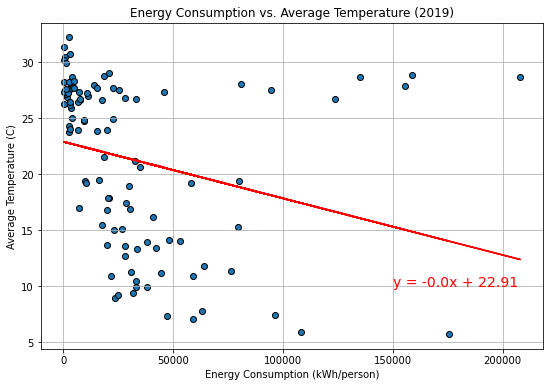

In [5]:
#scatter plot showing the correlation between temp and primary energy consumption
energy_consumption = main_data["Primary energy consumption per capita (kWh/person)"]
temperature = main_data["Average Temp"]

plt.figure(figsize=(9,6))
plt.grid()
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (150000, 10), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [6]:
#create two data frames (high and low temperatures)

high_temps = main_data.loc[main_data['Average Temp'] >= 20]
low_temps = main_data.loc[main_data['Average Temp'] < 20]


The r-squared is: 0.009008899533743026


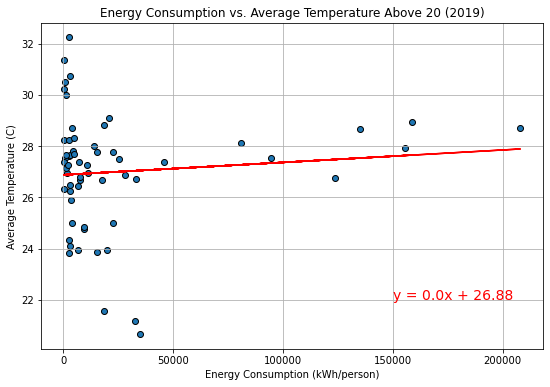

In [7]:
#scatter plot showing the correlation between temp and primary energy consumption in high temp 
energy_consumption = high_temps["Primary energy consumption per capita (kWh/person)"]
temperature = high_temps["Average Temp"]

plt.figure(figsize=(9,6))
plt.grid()
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature Above 20 (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (150000, 22), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

The r-squared is: 0.25959210082336165


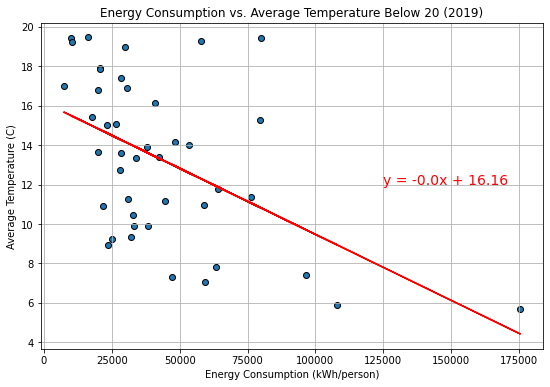

In [8]:
#scatter plot showing the correlation between temp and primary energy consumption in low temp 
energy_consumption = low_temps["Primary energy consumption per capita (kWh/person)"]
temperature = low_temps["Average Temp"]

plt.figure(figsize=(9,6))
plt.grid()
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature Below 20 (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (125000, 12), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [9]:

# Find the country with the highest temperature
country_with_highest_temp = main_data[main_data['Average Temp'] == main_data['Average Temp'].max()]

# Get the low-carbon electricity percentage for the country with the highest temperature
low_carbon_percentage_highest_temp = country_with_highest_temp['Low-carbon electricity (% electricity)'].values[0]

# Find the country with the lowest temperature
country_with_lowest_temp = main_data[main_data['Average Temp'] == main_data['Average Temp'].min()]

# Get the low-carbon electricity percentage for the country with the lowest temperature
low_carbon_percentage_lowest_temp = country_with_lowest_temp['Low-carbon electricity (% electricity)'].values[0]

# Print the results
print(f'The low carbon electricity percentage in the country with the highest temperature is {low_carbon_percentage_highest_temp:.2f}%')
print(f'The low carbon electricity percentage in the country with the lowest temperature is {low_carbon_percentage_lowest_temp:.2f}%')

The low carbon electricity percentage in the country with the highest temperature is 63.34%
The low carbon electricity percentage in the country with the lowest temperature is 100.00%


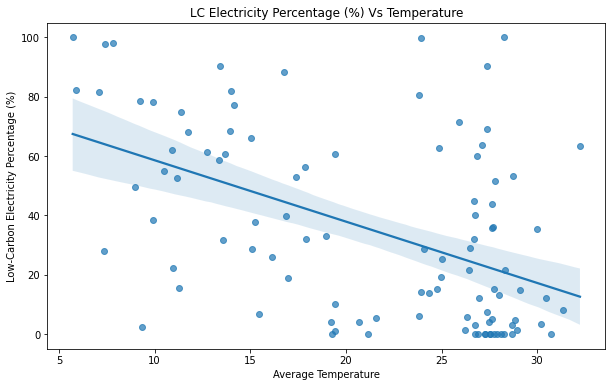

<Figure size 432x288 with 0 Axes>

In [20]:
# Create a scatter plot with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=main_data['Average Temp'], y=main_data['Low-carbon electricity (% electricity)'], scatter_kws={'alpha':0.7})
plt.xlabel('Average Temperature')
plt.ylabel('Low-Carbon Electricity Percentage (%)')
plt.title('LC Electricity Percentage (%) Vs Temperature')
#plt.grid(True)
plt.show()
# Save the figure
plt.savefig("output_data/LC-Electricity(%)&Temperature-scaterPlot.png")

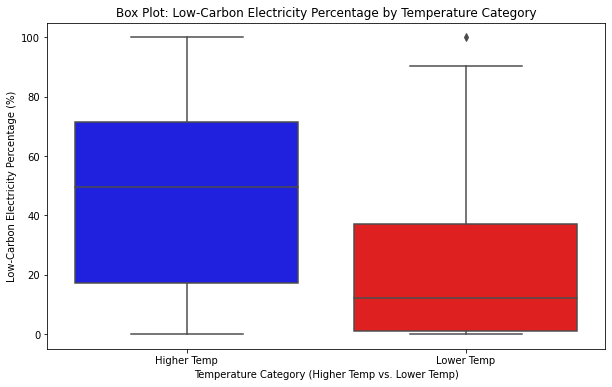

<Figure size 432x288 with 0 Axes>

In [11]:
# Create a box plot to compare low-carbon electricity percentage by temperature category
plt.figure(figsize=(10, 6))
sns.boxplot(x=main_data['Average Temp'] > 25, y=main_data['Low-carbon electricity (% electricity)'], palette=['blue', 'red'])
plt.xlabel('Temperature Category (Higher Temp vs. Lower Temp)')
plt.ylabel('Low-Carbon Electricity Percentage (%)')
plt.title('Box Plot: Low-Carbon Electricity Percentage by Temperature Category')
plt.xticks([0, 1], ['Higher Temp', 'Lower Temp'])
plt.show()
plt.savefig("output_data/LC-Electricity(%)&Temperature.png")
# Save the figure
plt.savefig("output_data/LC-Electricity(%)&Temperature-BoxPlot.png")

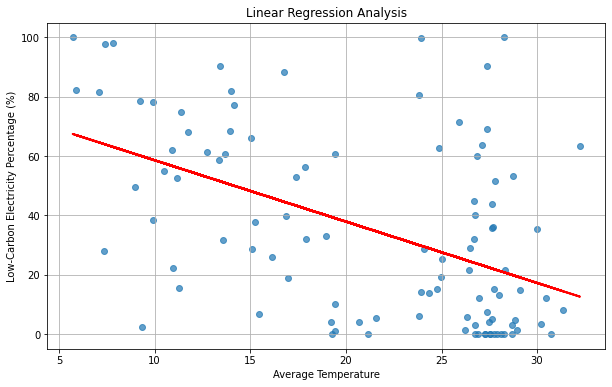

Slope (Coefficient): -2.0688
Intercept: 79.2755


<Figure size 432x288 with 0 Axes>

In [12]:
# Define the independent variable (X) and dependent variable (y)
X = main_data['Average Temp']
y = main_data['Low-carbon electricity (% electricity)']

# Calculate the coefficients (slope and intercept) using numpy's polyfit
coefficients = np.polyfit(X, y, deg=1)

# Create the regression line
regression_line = coefficients[0] * X + coefficients[1]

# Plot the main_data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.plot(X, regression_line, color='red', linewidth=2)
plt.xlabel('Average Temperature')
plt.ylabel('Low-Carbon Electricity Percentage (%)')
plt.title('Linear Regression Analysis')
plt.grid(True)
plt.show()

# Print the coefficients
slope, intercept = coefficients
print(f'Slope (Coefficient): {slope:.4f}')
print(f'Intercept: {intercept:.4f}')
# Save the figure
plt.savefig("output_data/LC-Electricity(%)&Temperature-linear-regression.png")

In [21]:
# Sort the main_data by 'Average Temp' in ascending order to get the lowest temperature countries
lowest_temp_countries = main_data.sort_values(by='Average Temp', ascending=True).head(10)

# Sort the main_data by 'Average Temp' in descending order to get the highest temperature countries
highest_temp_countries = main_data.sort_values(by='Average Temp', ascending=False).head(10)

# Concatenate the two main_dataFrames to get the final result
result_df = pd.concat([lowest_temp_countries, highest_temp_countries])

# Reset the index of the resulting main_dataFrame
result_df.reset_index(drop=True, inplace=True)

# Display the result main_dataFrame
result_df.head(20)


,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population
0,Iceland,5.715385,81.07,0.00,0.00,19.12,100.000000,175527.73000,1639.999986,64.963051,-19.020835,366669
1,Canada,5.912088,22.11,110.65,95.47,421.80,82.378334,107980.76000,580210.022000,56.130366,-106.346771,37888705
2,Finland,7.070604,45.76,12.63,23.87,31.88,81.529690,59219.41800,40709.999080,61.924110,25.748151,5529468
3,Estonia,7.326648,31.29,5.47,0.00,2.14,28.120895,47295.33600,10180.000310,58.595272,25.013607,1329444
4,Norway,7.402473,62.37,2.76,0.00,131.07,97.937690,96392.50000,35950.000760,60.472024,8.468946,5379839
5,Sweden,7.812948,52.88,3.35,66.13,98.94,98.010925,63283.47000,35000.000000,60.128161,18.643501,10368969
6,Latvia,8.948485,41.52,3.25,0.00,3.19,49.534160,23394.70000,7570.000172,56.879635,24.603189,1897052
7,Lithuania,9.236264,33.53,0.67,0.00,2.47,78.662415,24873.11700,11729.999540,55.169438,23.881275,2820267
8,Belarus,9.339286,7.83,36.74,0.00,0.94,2.494692,31923.43600,57669.998170,53.709807,27.953389,9633740
9,Ireland,9.892857,12.34,18.92,0.00,11.80,38.411460,38270.87500,35750.000000,53.412910,-8.243890,4946119


In [23]:
#to get just the 3 data informations :country ,Average Temp ,Low-carbon electricity (% electricity)

# Sort the main_data by 'Average Temp' in ascending order to get the lowest temperature countries
lowest_temp_countries = main_data.sort_values(by='Average Temp', ascending=True).head(10)[['Country', 'Average Temp', 'Low-carbon electricity (% electricity)']]
print (lowest_temp_countries)
# Sort the main_data by 'Average Temp' in descending order to get the highest temperature countries
highest_temp_countries = main_data.sort_values(by='Average Temp', ascending=False).head(10)[['Country', 'Average Temp', 'Low-carbon electricity (% electricity)']]
print (highest_temp_countries)
# Concatenate the two main_dataFrames to get the final result
result_df = pd.concat([lowest_temp_countries, highest_temp_countries])

# Reset the index of the resulting main_dataFrame
result_df.reset_index(drop=True, inplace=True)

# Display the result main_dataFrame
print(result_df)

      Country  Average Temp  Low-carbon electricity (% electricity)
39    Iceland      5.715385                              100.000000
14     Canada      5.912088                               82.378334
28    Finland      7.070604                               81.529690
26    Estonia      7.326648                               28.120895
67     Norway      7.402473                               97.937690
90     Sweden      7.812948                               98.010925
49     Latvia      8.948485                               49.534160
52  Lithuania      9.236264                               78.662415
9     Belarus      9.339286                                2.494692
42    Ireland      9.892857                               38.411460
         Country  Average Temp  Low-carbon electricity (% electricity)
89         Sudan     32.239286                               63.335380
66         Niger     31.365934                                8.196721
22      Djibouti     30.737912         

Analysis : the coldest country are Iceland, canada,finland and others  are all Iceland, and the uses of Low carbon electricity pourcentage is very hight above belarus and estonia ,irland 

In [17]:
# Perform Linear Regression Analysis
# For Lowest Temperature Countries
coefficients_low_temp = np.polyfit(lowest_temp_countries['Average Temp'], lowest_temp_countries['Low-carbon electricity (% electricity)'], deg=1)

# For Highest Temperature Countries
coefficients_high_temp = np.polyfit(highest_temp_countries['Average Temp'], highest_temp_countries['Low-carbon electricity (% electricity)'], deg=1)

# For All Countries
coefficients_all = np.polyfit(main_data['Average Temp'], main_data['Low-carbon electricity (% electricity)'], deg=1)

# Print the regression coefficients
print(f"Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = {coefficients_low_temp[0]:.4f}")
print(f"Linear Regression for Highest Temperature Countries: Slope (Coefficient) = {coefficients_high_temp[0]:.4f}")
print(f"Linear Regression for All Countries: Slope (Coefficient) = {coefficients_all[0]:.4f}")

# Show the plots
plt.tight_layout()
plt.show()

Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = -13.9328
Linear Regression for Highest Temperature Countries: Slope (Coefficient) = 4.6044
Linear Regression for All Countries: Slope (Coefficient) = -2.0688


<Figure size 432x288 with 0 Axes>

Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = -13.9328
Linear Regression for Highest Temperature Countries: Slope (Coefficient) = 4.6044
Linear Regression for All Countries: Slope (Coefficient) = -2.07


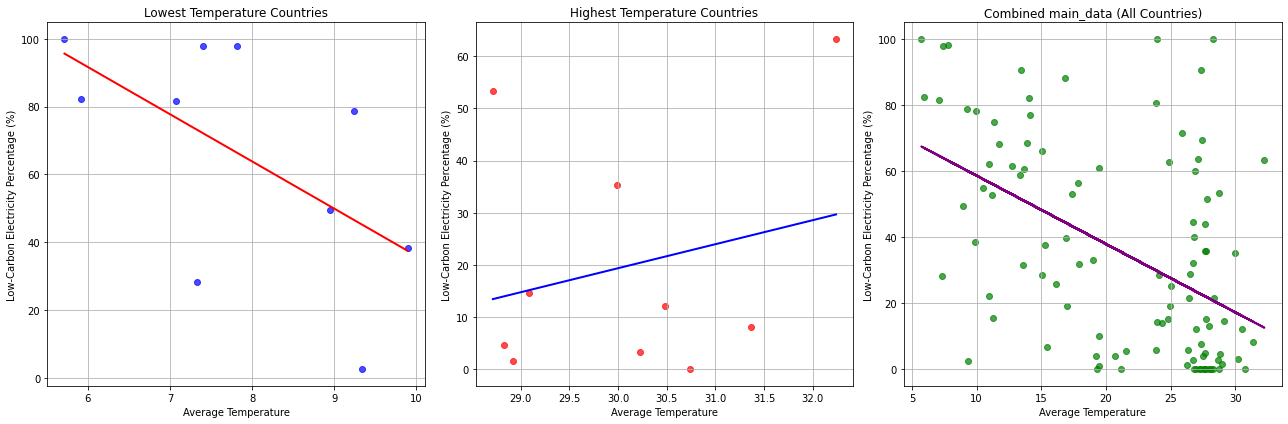

In [18]:
# Create subplots for the visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualization 1: Scatter Plot for Lowest Temperature Countries
axes[0].scatter(lowest_temp_countries['Average Temp'], lowest_temp_countries['Low-carbon electricity (% electricity)'], alpha=0.7, color='blue')
axes[0].set_xlabel('Average Temperature')
axes[0].set_ylabel('Low-Carbon Electricity Percentage (%)')
axes[0].set_title('Lowest Temperature Countries')
axes[0].grid(True)

# Perform Linear Regression for Lowest Temperature Countries
coefficients_low_temp = np.polyfit(lowest_temp_countries['Average Temp'], lowest_temp_countries['Low-carbon electricity (% electricity)'], deg=1)
regression_line_low_temp = coefficients_low_temp[0] * lowest_temp_countries['Average Temp'] + coefficients_low_temp[1]
axes[0].plot(lowest_temp_countries['Average Temp'], regression_line_low_temp, color='red', linewidth=2)
# Save the figure
plt.savefig("output_data/Scatter-Plot-with-linear-regression-for-Lowest-Temperature-Countries.png")
# Visualization 2: Scatter Plot for Highest Temperature Countries
axes[1].scatter(highest_temp_countries['Average Temp'], highest_temp_countries['Low-carbon electricity (% electricity)'], alpha=0.7, color='red')
axes[1].set_xlabel('Average Temperature')
axes[1].set_ylabel('Low-Carbon Electricity Percentage (%)')
axes[1].set_title('Highest Temperature Countries')
axes[1].grid(True)

# Perform Linear Regression for Highest Temperature Countries
coefficients_high_temp = np.polyfit(highest_temp_countries['Average Temp'], highest_temp_countries['Low-carbon electricity (% electricity)'], deg=1)
regression_line_high_temp = coefficients_high_temp[0] * highest_temp_countries['Average Temp'] + coefficients_high_temp[1]
axes[1].plot(highest_temp_countries['Average Temp'], regression_line_high_temp, color='blue', linewidth=2)
# Save the figure
plt.savefig("output_data/Scatter-Plot-with-linear-regression-for-highest-Temperature-Countries.png")
# Visualization 3: Combined Scatter Plot for All Countries
axes[2].scatter(main_data['Average Temp'], main_data['Low-carbon electricity (% electricity)'], alpha=0.7, color='green')
axes[2].set_xlabel('Average Temperature')
axes[2].set_ylabel('Low-Carbon Electricity Percentage (%)')
axes[2].set_title('Combined main_data (All Countries)')
axes[2].grid(True)

# Perform Linear Regression for All Countries
coefficients_all = np.polyfit(main_data['Average Temp'], main_data['Low-carbon electricity (% electricity)'], deg=1)
regression_line_all = coefficients_all[0] * main_data['Average Temp'] + coefficients_all[1]
axes[2].plot(main_data['Average Temp'], regression_line_all, color='purple', linewidth=2)
# Save the figure
plt.savefig("output_data/Combined-Scatter-Plot-with-linear-regression-for-All-Countries.png")
# Print the regression coefficients
print(f"Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = {coefficients_low_temp[0]:.4f}")
print(f"Linear Regression for Highest Temperature Countries: Slope (Coefficient) = {coefficients_high_temp[0]:.4f}")
print(f"Linear Regression for All Countries: Slope (Coefficient) = {coefficients_all[0]:.2f}")

# Show the plots
plt.tight_layout()
plt.show()

Analyse :the analysis indicates that temperature can be a factor influencing the choice of electricity sources in different countries. Colder countries(-13.93) tend to rely more on low-carbon electricity sources, while hotter countries (4.60) in this group tend to use more low-carbon electricity sources


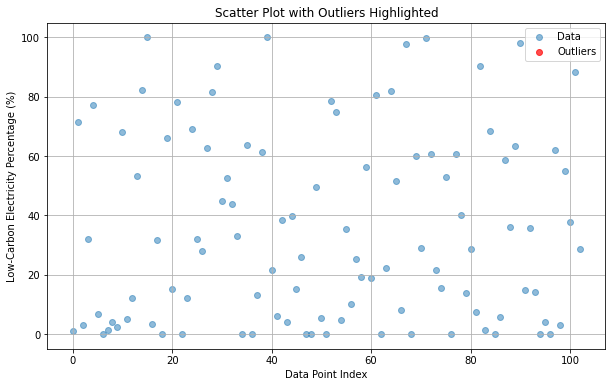

In [25]:

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = main_data['Low-carbon electricity (% electricity)'].quantile(0.25)
Q3 = main_data['Low-carbon electricity (% electricity)'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = main_data[(main_data['Low-carbon electricity (% electricity)'] < lower_bound) | (main_data['Low-carbon electricity (% electricity)'] > upper_bound)]

# Create a scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(main_data.index, main_data['Low-carbon electricity (% electricity)'], label='Data', alpha=0.5)
plt.scatter(outliers.index, outliers['Low-carbon electricity (% electricity)'], color='red', label='Outliers', alpha=0.7)
plt.xlabel('Data Point Index')
plt.ylabel('Low-Carbon Electricity Percentage (%)')
plt.title('Scatter Plot with Outliers Highlighted')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


there are no outliers in this dataset